## 1. Data Preparation & Exploration




(extra notes)
NOTES 
Data is imbalanced, might need to down sample\
AGE does not seem to correlate well, better to bin them

### 1.1 Data Importation
In this section, we import the required libraries and load the `.csv` file into a pandas dataframe.\
As the last column was very verbose (default payment next month), we decided to shorten it to LABELS.

In [53]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random 
sns.set()
np.random.seed(111)

In [54]:
df = pd.read_csv('../data/card.csv',index_col='ID', skiprows = 1)
df.rename(columns={'default payment next month': 'LABELS'}, inplace = True)
df.head(10)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,LABELS
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
6,50000,1,1,2,37,0,0,0,0,0,...,19394,19619,20024,2500,1815,657,1000,1000,800,0
7,500000,1,1,2,29,0,0,0,0,0,...,542653,483003,473944,55000,40000,38000,20239,13750,13770,0
8,100000,2,2,2,23,0,-1,-1,0,0,...,221,-159,567,380,601,0,581,1687,1542,0
9,140000,2,3,1,28,0,0,2,0,0,...,12211,11793,3719,3329,0,432,1000,1000,1000,0


### 1.2 Data Attributes
To further understand our dataset, we went on to do some exploration on the pandas dataframe.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 1 to 30000
Data columns (total 24 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   LIMIT_BAL  30000 non-null  int64
 1   SEX        30000 non-null  int64
 2   EDUCATION  30000 non-null  int64
 3   MARRIAGE   30000 non-null  int64
 4   AGE        30000 non-null  int64
 5   PAY_0      30000 non-null  int64
 6   PAY_2      30000 non-null  int64
 7   PAY_3      30000 non-null  int64
 8   PAY_4      30000 non-null  int64
 9   PAY_5      30000 non-null  int64
 10  PAY_6      30000 non-null  int64
 11  BILL_AMT1  30000 non-null  int64
 12  BILL_AMT2  30000 non-null  int64
 13  BILL_AMT3  30000 non-null  int64
 14  BILL_AMT4  30000 non-null  int64
 15  BILL_AMT5  30000 non-null  int64
 16  BILL_AMT6  30000 non-null  int64
 17  PAY_AMT1   30000 non-null  int64
 18  PAY_AMT2   30000 non-null  int64
 19  PAY_AMT3   30000 non-null  int64
 20  PAY_AMT4   30000 non-null  int64
 21  PAY_AMT5   3

In [4]:
df.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,LABELS
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


### 1.3 Data Visualisation
Next, we plot out all the data out to get an understanding about the possible trends and distributions of the data attributes. 

#### 1.3.1 Distrubution Densites
Results are plotted to see how they are distributed.

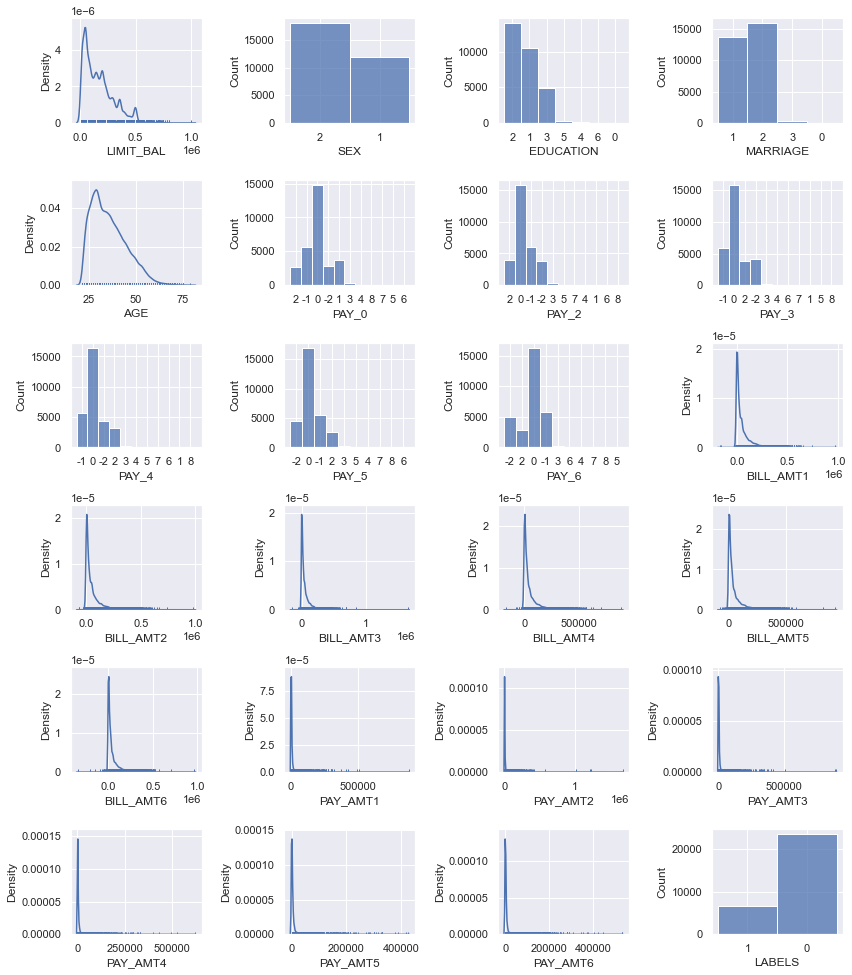

In [5]:
# Array of indices of continuous variables
continuous_var = [0,4,11,12,13,14,15,16,17,18,19,20,21,22]

import warnings # to supress all the warnings due to old seaborn feature used
warnings.simplefilter(action='ignore', category=FutureWarning)

#Plotting Distributions
fig = plt.figure(figsize=(12,20))
for i in range(len(df.columns)):
    fig.add_subplot(9,4,i+1)
    if i in continuous_var:
        sns.distplot((df.iloc[:,i]).dropna(), rug=True, hist=False, kde_kws={'bw':0.1})
    else:
        sns.histplot((df.iloc[:,i]).astype(str).dropna())   
    plt.xlabel(df.columns[i])
plt.tight_layout()
plt.show()

### 1.3.2 Boxplots
Next, we want to see how continuous data is scattered using a boxplot to have a different understanding of the distributions.

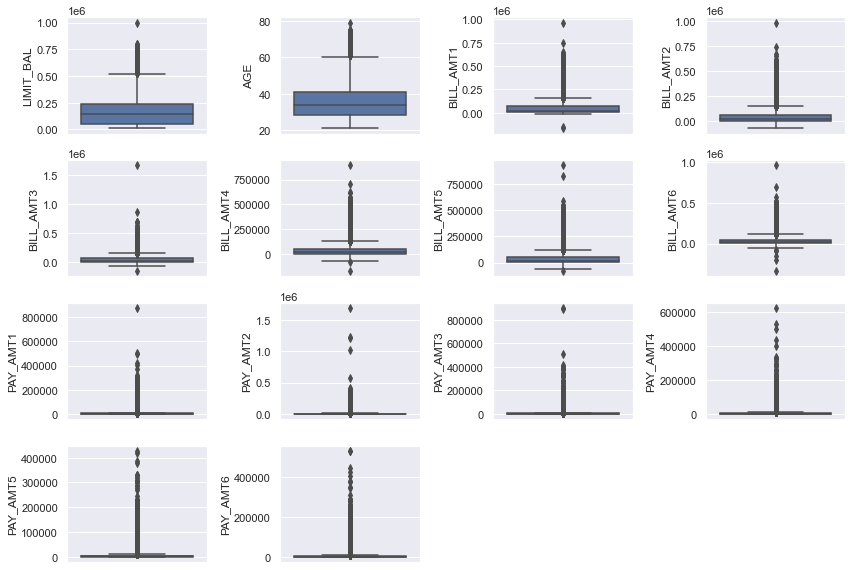

In [6]:
#Plotting Box Plots
fig = plt.figure(figsize=(12,18))
counter0 = 0
for i in range(len(df.columns)):
    if i in continuous_var:
        fig.add_subplot(9,4,counter0+1)
        sns.boxplot(y=df.iloc[:,i])
        counter0 += 1

plt.tight_layout()
plt.show()

Here, we observe the number of outliers. We see that there is 7819 outliers which makes up quite a portion of our dataset. We choose not to remove them as they may contain valuable information.

In [7]:
continuous_var = df.select_dtypes(exclude='object')
outliers = 0
for i in continuous_var:
  outliers += len(df[np.abs(df[i]-df[i].mean()) >= (3*df[i].std())])
print(outliers)


7819


### 1.4 Data Preprocessing
After visualising the data, we can then do some alterations to the data to account for 'irregularities' including:
- A marriage status of 0 when it is ranged [1,3]. Since 3 is 'others' we assign status 0 to 3.
- An education status of 0, 5 and 6 is assigned to 4 (others) as well as they were invalid
- Pay status of -2 and 0 are invalid, so a new column (PAY_ISINVALID) is created: 0 if at least 1 PAY_N is invalid, 1 otherwise.

In [55]:
#There is Marriage with 0 -> Move them to 3 (others)
df.loc[df.MARRIAGE == 0, 'MARRIAGE'] = 3
#There is Education with 0, 5 and 6 -> Move them to 4 (others)
df.loc[df.EDUCATION == 0, 'EDUCATION'] = 4
df.loc[df.EDUCATION == 5, 'EDUCATION'] = 4
df.loc[df.EDUCATION == 6, 'EDUCATION'] = 4

#Create new column for invalid PAY values
def valid_pay(row):
    ans = 0 # 0: valid, 1: invalid
    for i in ['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']:
        if row[i] == -2 or row[i] == 0:
            ans = 1
            break
    return ans
df['PAY_ISINVALID'] = df.apply(lambda x : valid_pay(x), axis = 1)

## 2. Feature Selection
In this section, we will look at what are the best features to use in our models and what are the models that should be dropped when training the model.

### 2.1 Train & Test Data Splitting
Before we do any further analysis, we need to split the data into the train and test datasets, as the statistics calculated for feature selection should not be influenced by test data which the model should not "see" in the first place.

In [56]:
#Split into train test set
np.random.seed(111)
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df, test_size=0.25)
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22500 entries, 15945 to 12117
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   LIMIT_BAL      22500 non-null  int64
 1   SEX            22500 non-null  int64
 2   EDUCATION      22500 non-null  int64
 3   MARRIAGE       22500 non-null  int64
 4   AGE            22500 non-null  int64
 5   PAY_0          22500 non-null  int64
 6   PAY_2          22500 non-null  int64
 7   PAY_3          22500 non-null  int64
 8   PAY_4          22500 non-null  int64
 9   PAY_5          22500 non-null  int64
 10  PAY_6          22500 non-null  int64
 11  BILL_AMT1      22500 non-null  int64
 12  BILL_AMT2      22500 non-null  int64
 13  BILL_AMT3      22500 non-null  int64
 14  BILL_AMT4      22500 non-null  int64
 15  BILL_AMT5      22500 non-null  int64
 16  BILL_AMT6      22500 non-null  int64
 17  PAY_AMT1       22500 non-null  int64
 18  PAY_AMT2       22500 non-null  int64
 19  

### 2.2 Correlation
In this subsection, we want to look at the pairwise correlation coefficients between all vairables to look out for the following factors:
- Corrleation with the target variable (LABELS) to see which variable might "contribute" more to the outcome
- Corrleation with each other to spot potential collinearity issues

<AxesSubplot:title={'center':'High Correlation'}>

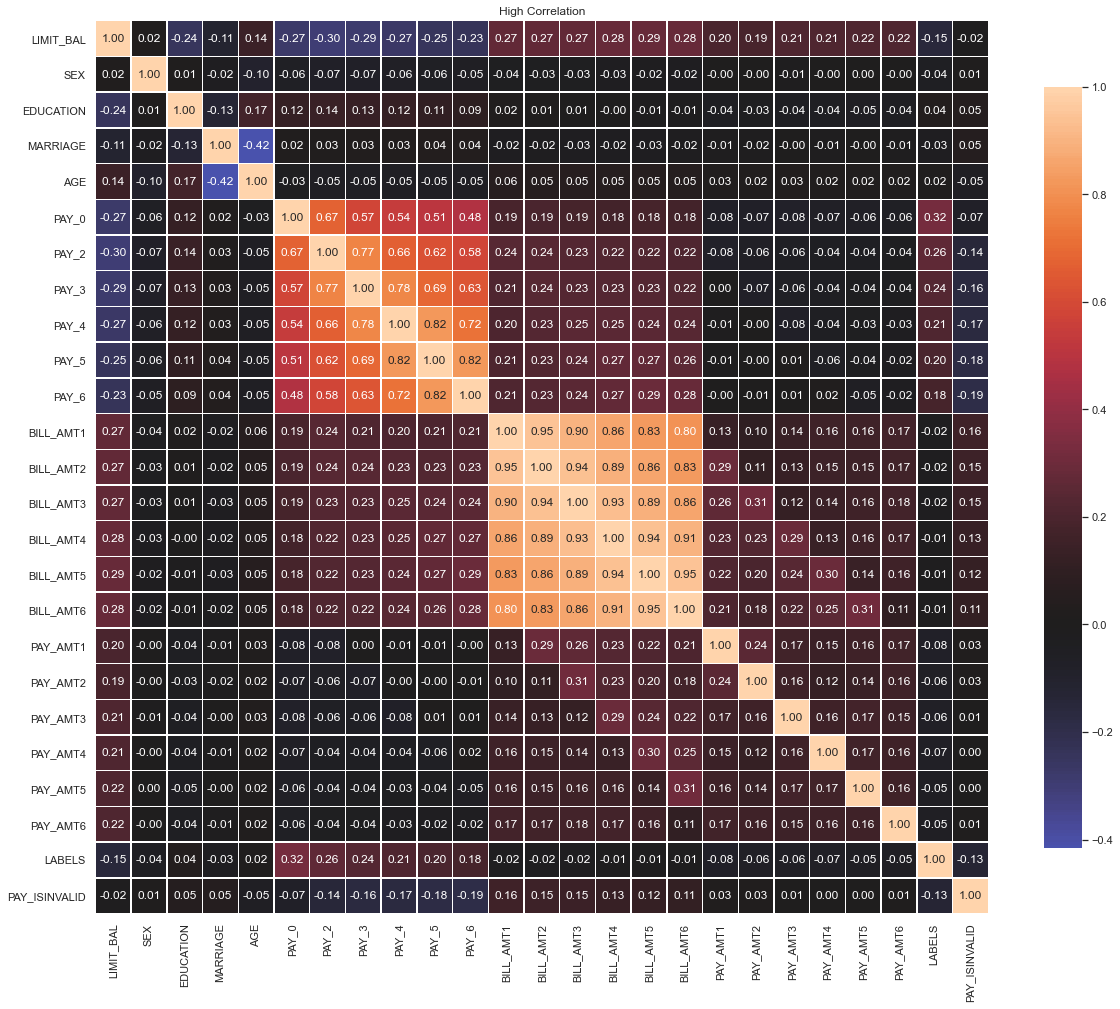

In [10]:
#Plotting Correlation Tables
num_correlation = df_train.select_dtypes(exclude='object').corr()
plt.figure(figsize=(20,20))
plt.title('High Correlation')
sns.heatmap(num_correlation, vmax=1.0, center=0, fmt='.2f',
                square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .70})

After calculating correlation with the target variable (LABELS), we then seperate the target variable out into an independent matrix so that the target values would not influence the model generation.

In [57]:
X = df_train.drop(['LABELS'], axis=1)
y = df_train['LABELS']
X_test = df_test.drop(['LABELS'], axis=1)
y_test = df_test['LABELS']
X.head(5)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,PAY_ISINVALID
ID,,,,,,,,,,,,,,,,,,,,,
15945,100000,2,3,1,36,0,0,0,0,0,...,100055,80923,81249,3830,4100,4510,3186,2886,3020,1
22955,400000,2,3,1,44,0,0,0,0,0,...,30364,28085,28708,5025,5044,2514,988,2004,5000,1
27853,50000,2,1,2,27,2,0,0,0,2,...,49423,48377,48158,3000,2525,3900,0,2000,4500,1
25681,290000,2,2,1,31,0,0,0,0,0,...,189354,193163,197303,10000,10490,6620,6700,7000,7150,1
24430,50000,1,3,2,39,0,0,0,0,0,...,41424,41182,41187,2000,2000,2000,1600,2000,2000,1


### 2.3 ANOVA
With the correlation in mind, we can see that there are some degree of colinearity within each of the the PAY_N and BILL_AMT_N columns. Therefore, we want to conduct ANOVA to see if there are features that are too simillar (equal means) - therefore removing them from our training dataframe.

In [12]:
#Feature Selection using ANOVA
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

np.random.seed(111)
fs = SelectKBest(score_func=f_classif, k=5)
fit = fs.fit(X,y)
#create df for scores
dfscores = pd.DataFrame(fit.scores_)
#create df for column names
dfcolumns = pd.DataFrame(X.columns)
dfpvalues = pd.DataFrame(fit.pvalues_)
dfpvaluesrej = pd.DataFrame(fit.pvalues_>0.05)

#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores,dfpvalues,dfpvaluesrej],axis=1)
#naming the dataframe columns
featureScores.columns = ['Selected_columns','Score_ANOVA','P-value','Reject'] 
#print 10 best features
print(featureScores.nlargest(30,'Score_ANOVA'))  


   Selected_columns  Score_ANOVA        P-value  Reject
5             PAY_0  2622.408213   0.000000e+00   False
6             PAY_2  1666.909250   0.000000e+00   False
7             PAY_3  1330.145020  5.382144e-283   False
8             PAY_4  1082.165939  7.618441e-232   False
9             PAY_5   907.317617  1.900139e-195   False
10            PAY_6   788.474799  1.504109e-170   False
0         LIMIT_BAL   537.212481  1.811092e-117   False
23    PAY_ISINVALID   365.374930   8.319349e-81   False
17         PAY_AMT1   132.507149   1.411609e-30   False
20         PAY_AMT4    98.378231   3.855986e-23   False
18         PAY_AMT2    90.027508   2.574562e-21   False
19         PAY_AMT3    86.316216   1.668642e-20   False
21         PAY_AMT5    66.297846   4.076438e-16   False
22         PAY_AMT6    66.177133   4.333110e-16   False
1               SEX    40.381485   2.129157e-10   False
2         EDUCATION    28.974347   7.407698e-08   False
3          MARRIAGE    17.303470   3.197862e-05 

After the ANOVA test, it is clear that we need to reject BILL_AMT_5 and 6 as their p-values are below 0.05.\
Therefore, we drop these 2 columns first before doing another round of ANOVA to make sure that all the features by ANOVA are significant.\

In [58]:
X = X.drop(['BILL_AMT5','BILL_AMT6'], axis=1)
X_test = X_test.drop(['BILL_AMT5','BILL_AMT6'], axis=1)
X.head(5) #(to see how the df looks like now)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT2,BILL_AMT3,BILL_AMT4,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,PAY_ISINVALID
ID,,,,,,,,,,,,,,,,,,,,,
15945,100000,2,3,1,36,0,0,0,0,0,...,101554,101827,100055,3830,4100,4510,3186,2886,3020,1
22955,400000,2,3,1,44,0,0,0,0,0,...,36680,35670,30364,5025,5044,2514,988,2004,5000,1
27853,50000,2,1,2,27,2,0,0,0,2,...,47691,49140,49423,3000,2525,3900,0,2000,4500,1
25681,290000,2,2,1,31,0,0,0,0,0,...,274119,275169,189354,10000,10490,6620,6700,7000,7150,1
24430,50000,1,3,2,39,0,0,0,0,0,...,40701,41342,41424,2000,2000,2000,1600,2000,2000,1


In [14]:
np.random.seed(111)
fs = SelectKBest(score_func=f_classif, k=5)
fit = fs.fit(X,y)
#create df for scores
dfscores = pd.DataFrame(fit.scores_)
#create df for column names
dfcolumns = pd.DataFrame(X.columns)
dfpvalues = pd.DataFrame(fit.pvalues_)
dfpvaluesrej = pd.DataFrame(fit.pvalues_>0.05)

#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores,dfpvalues,dfpvaluesrej],axis=1)
#naming the dataframe columns
featureScores.columns = ['Selected_columns','Score_ANOVA','P-value','Reject'] 
#print 10 best features
print(featureScores.nlargest(30,'Score_ANOVA'))  

   Selected_columns  Score_ANOVA        P-value  Reject
5             PAY_0  2622.408213   0.000000e+00   False
6             PAY_2  1666.909250   0.000000e+00   False
7             PAY_3  1330.145020  5.382144e-283   False
8             PAY_4  1082.165939  7.618441e-232   False
9             PAY_5   907.317617  1.900139e-195   False
10            PAY_6   788.474799  1.504109e-170   False
0         LIMIT_BAL   537.212481  1.811092e-117   False
21    PAY_ISINVALID   365.374930   8.319349e-81   False
15         PAY_AMT1   132.507149   1.411609e-30   False
18         PAY_AMT4    98.378231   3.855986e-23   False
16         PAY_AMT2    90.027508   2.574562e-21   False
17         PAY_AMT3    86.316216   1.668642e-20   False
19         PAY_AMT5    66.297846   4.076438e-16   False
20         PAY_AMT6    66.177133   4.333110e-16   False
1               SEX    40.381485   2.129157e-10   False
2         EDUCATION    28.974347   7.407698e-08   False
3          MARRIAGE    17.303470   3.197862e-05 

### 2.4 Sequential Forward Selection
On the 2nd iteration, we do not reject the null hypothesis for all of the columns now. Therefore, we are done with ANOVA and thus we can continue the feature selection via Sequential Forward Selection (via logistic regression).

In [15]:
#Leaps or feature selection based on logistic regression
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.linear_model import LogisticRegression

np.random.seed(111)

# Build RF classifier to use in feature selection
clf = LogisticRegression()

# Build step forward feature selection
sfs = sfs(clf,
          n_jobs = -1,
           k_features=10,
           forward=True,
           floating=False,
           verbose=2,
           scoring='accuracy',
           cv=5)
sfs = sfs.fit(X, y)

print(sfs.k_feature_idx_)
print(sfs.subsets_)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  19 out of  22 | elapsed:    7.4s remaining:    1.1s
[Parallel(n_jobs=-1)]: Done  22 out of  22 | elapsed:    7.5s finished

[2020-11-19 22:45:59] Features: 1/10 -- score: 0.8182222222222222[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 out of  21 | elapsed:    1.2s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  21 out of  21 | elapsed:    1.6s finished

[2020-11-19 22:46:00] Features: 2/10 -- score: 0.8182222222222222[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 out of  20 | elapsed:    1.6s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    1.7s finished

[2020-11-19 22:46:02] Features: 3/10 -- score: 0.8146666666666667[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  14 out of  19

(1, 2, 3, 4, 5, 15, 17, 19, 20, 21)
{1: {'feature_idx': (5,), 'cv_scores': array([0.81755556, 0.81511111, 0.814     , 0.82022222, 0.82422222]), 'avg_score': 0.8182222222222222, 'feature_names': ('PAY_0',)}, 2: {'feature_idx': (2, 5), 'cv_scores': array([0.81755556, 0.81511111, 0.814     , 0.82022222, 0.82422222]), 'avg_score': 0.8182222222222222, 'feature_names': ('EDUCATION', 'PAY_0')}, 3: {'feature_idx': (2, 5, 17), 'cv_scores': array([0.81422222, 0.81244444, 0.81155556, 0.81866667, 0.81644444]), 'avg_score': 0.8146666666666667, 'feature_names': ('EDUCATION', 'PAY_0', 'PAY_AMT3')}, 4: {'feature_idx': (2, 5, 17, 19), 'cv_scores': array([0.81466667, 0.80933333, 0.80911111, 0.80911111, 0.816     ]), 'avg_score': 0.8116444444444445, 'feature_names': ('EDUCATION', 'PAY_0', 'PAY_AMT3', 'PAY_AMT5')}, 5: {'feature_idx': (2, 5, 17, 19, 21), 'cv_scores': array([0.81333333, 0.81044444, 0.80933333, 0.81155556, 0.81377778]), 'avg_score': 0.8116888888888889, 'feature_names': ('EDUCATION', 'PAY_0',

[Parallel(n_jobs=-1)]: Done  13 out of  13 | elapsed:    2.9s finished

[2020-11-19 22:46:24] Features: 10/10 -- score: 0.8141777777777778

Indices chosen: 1,2,3,4,5,15,17,19,20,21. They correspond to:\
`SEX, EDUCATION, MARRIAGE, AGE, PAY_0, PAY_AMT3, PAY_AMT4, PAY_AMT5, PAY_AMT6, PAY_ISINVALID`\
The rest are to be dropped.\
Next, we restrict the input dataframe to these 10 columns only.

In [59]:
X = X.iloc[:,[1,2,3,4,5,15,17,19,20,21]]
X_test = X_test.iloc[:,[1,2,3,4,5,15,17,19,20,21]]
len(X.columns)
X.head()

,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_AMT1,PAY_AMT3,PAY_AMT5,PAY_AMT6,PAY_ISINVALID
ID,,,,,,,,,,
15945,2,3,1,36,0,3830,4510,2886,3020,1
22955,2,3,1,44,0,5025,2514,2004,5000,1
27853,2,1,2,27,2,3000,3900,2000,4500,1
25681,2,2,1,31,0,10000,6620,7000,7150,1
24430,1,3,2,39,0,2000,2000,2000,2000,1


## 3. Model Selection & Evaluation
In this section, we will be trying out 7 models/classifiers in scikit-learn: Logistic Regression, Gaussian Naive Bayes, Bernouli Naive Bayes, Support Vector (Machine), Multi-layer Perceptron, Random Forest, Gradient Boosting.\
After running the models, we will then calculate the evaluation statistics (Accuracy, Mean Absolute Error, AUC Score, F1 Score).\
We will first start by importing the required packages.

In [60]:
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB, BernoulliNB 
from sklearn.svm import SVC #Needs minMaxScaler()
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

### 3.1 Logistic Regression

In [18]:
np.random.seed(111)
lgc = LogisticRegression(max_iter = 10000)
lgc.fit(X,y)
train_pred = lgc.predict(X)
test_pred = lgc.predict(X_test)

print('Logistic Regression (accuracy_score) on Train Set: ' + str(accuracy_score(train_pred, y)))
print('Logistic Regression (accuracy_score) on Test Set: ' + str(accuracy_score(test_pred, y_test)))
print('Logistic Regression (mean_absolute_error) on Train Set: ' + str(mean_absolute_error(train_pred, y)))
print('Logistic Regression (mean_absolute_error) on Test Set: ' + str(mean_absolute_error(test_pred, y_test)))
print('Logistic Regression (roc_auc_score) on Train Set: ' + str(roc_auc_score(train_pred, y)))
print('Logistic Regression (roc_auc_score) on Test Set: ' + str(roc_auc_score(test_pred, y_test)))
print('Logistic Regression (f1_score) on Train Set: ' + str(f1_score(train_pred, y)))
print('Logistic Regression (f1_score) on Test Set: ' + str(f1_score(test_pred, y_test)))


Logistic Regression (accuracy_score) on Train Set: 0.8143111111111111
Logistic Regression (accuracy_score) on Test Set: 0.8188
Logistic Regression (mean_absolute_error) on Train Set: 0.18568888888888888
Logistic Regression (mean_absolute_error) on Test Set: 0.1812
Logistic Regression (roc_auc_score) on Train Set: 0.7637474810011408
Logistic Regression (roc_auc_score) on Test Set: 0.7829236276959295
Logistic Regression (f1_score) on Train Set: 0.39763552479815456
Logistic Regression (f1_score) on Test Set: 0.4083587287766651


### 3.2 Gaussian Naive Bayes Classifier

In [19]:
np.random.seed(111)
gnb = GaussianNB()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_test_scaled = scaler.transform(X_test)
gnb.fit(X_scaled,y)
train_pred = gnb.predict(X_scaled)
test_pred = gnb.predict(X_test_scaled)

print('GaussianNB (accuracy_score) on Train Set: ' + str(accuracy_score(train_pred, y)))
print('GaussianNB (accuracy_score) on Test Set: ' + str(accuracy_score(test_pred, y_test)))
print('GaussianNB (mean_absolute_error) on Train Set: ' + str(mean_absolute_error(train_pred, y)))
print('GaussianNB (mean_absolute_error) on Test Set: ' + str(mean_absolute_error(test_pred, y_test)))
print('GaussianNB (roc_auc_score) on Train Set: ' + str(roc_auc_score(train_pred, y)))
print('GaussianNB (roc_auc_score) on Test Set: ' + str(roc_auc_score(test_pred, y_test)))
print('GaussianNB (f1_score) on Train Set: ' + str(f1_score(train_pred, y)))
print('GaussianNB (f1_score) on Test Set: ' + str(f1_score(test_pred, y_test)))

GaussianNB (accuracy_score) on Train Set: 0.7295111111111111
GaussianNB (accuracy_score) on Test Set: 0.7332
GaussianNB (mean_absolute_error) on Train Set: 0.2704888888888889
GaussianNB (mean_absolute_error) on Test Set: 0.2668
GaussianNB (roc_auc_score) on Train Set: 0.641139053754801
GaussianNB (roc_auc_score) on Test Set: 0.6425343053173241
GaussianNB (f1_score) on Train Set: 0.4827468978412375
GaussianNB (f1_score) on Test Set: 0.4820088014496505


### 3.3 Bernoulli Naive Bayes Classifier

In [20]:
np.random.seed(111)
bnb = BernoulliNB()
bnb.fit(X,y)
train_pred = bnb.predict(X)
test_pred = bnb.predict(X_test)

print('BernoulliNB (accuracy_score) on Train Set: ' + str(accuracy_score(train_pred, y)))
print('BernoulliNB (accuracy_score) on Test Set: ' + str(accuracy_score(test_pred, y_test)))
print('BernoulliNB (mean_absolute_error) on Train Set: ' + str(mean_absolute_error(train_pred, y)))
print('BernoulliNB (mean_absolute_error) on Test Set: ' + str(mean_absolute_error(test_pred, y_test)))
print('BernoulliNB (roc_auc_score) on Train Set: ' + str(roc_auc_score(train_pred, y)))
print('BernoulliNB (roc_auc_score) on Test Set: ' + str(roc_auc_score(test_pred, y_test)))
print('BernoulliNB (f1_score) on Train Set: ' + str(f1_score(train_pred, y)))
print('BernoulliNB (f1_score) on Test Set: ' + str(f1_score(test_pred, y_test)))

BernoulliNB (accuracy_score) on Train Set: 0.7617333333333334
BernoulliNB (accuracy_score) on Test Set: 0.7633333333333333
BernoulliNB (mean_absolute_error) on Train Set: 0.23826666666666665
BernoulliNB (mean_absolute_error) on Test Set: 0.23666666666666666
BernoulliNB (roc_auc_score) on Train Set: 0.6422584506685505
BernoulliNB (roc_auc_score) on Test Set: 0.6448026441847097
BernoulliNB (f1_score) on Train Set: 0.41184860120680195
BernoulliNB (f1_score) on Test Set: 0.4128349321865696


### 3.4 Support Vector Machine

In [21]:
np.random.seed(111)
svc = SVC()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_test_scaled = scaler.transform(X_test)
svc.fit(X_scaled,y)
train_pred = svc.predict(X_scaled)
test_pred = svc.predict(X_test_scaled)

print('SVC (accuracy_score) on Train Set: ' + str(accuracy_score(train_pred, y)))
print('SVC (accuracy_score) on Test Set: ' + str(accuracy_score(test_pred, y_test)))
print('SVC (mean_absolute_error) on Train Set: ' + str(mean_absolute_error(train_pred, y)))
print('SVC (mean_absolute_error) on Test Set: ' + str(mean_absolute_error(test_pred, y_test)))
print('SVC (roc_auc_score) on Train Set: ' + str(roc_auc_score(train_pred, y)))
print('SVC (roc_auc_score) on Test Set: ' + str(roc_auc_score(test_pred, y_test)))
print('SVC (f1_score) on Train Set: ' + str(f1_score(train_pred, y)))
print('SVC (f1_score) on Test Set: ' + str(f1_score(test_pred, y_test)))

SVC (accuracy_score) on Train Set: 0.8209333333333333
SVC (accuracy_score) on Test Set: 0.8225333333333333
SVC (mean_absolute_error) on Train Set: 0.17906666666666668
SVC (mean_absolute_error) on Test Set: 0.17746666666666666
SVC (roc_auc_score) on Train Set: 0.7638980198821564
SVC (roc_auc_score) on Test Set: 0.7742678569926167
SVC (f1_score) on Train Set: 0.4589767691687928
SVC (f1_score) on Test Set: 0.45473166734944703


### 3.5.2 Decision Tree (Gini)

In [61]:
np.random.seed(111)
dtc = DecisionTreeClassifier(criterion="gini")
dtc.fit(X,y)
train_pred = dtc.predict(X)
test_pred = dtc.predict(X_test)

print('DecisionTreeClassifierG (accuracy_score) on Train Set: ' + str(accuracy_score(train_pred, y)))
print('DecisionTreeClassifierG (accuracy_score) on Test Set: ' + str(accuracy_score(test_pred, y_test)))
print('DecisionTreeClassifierG (mean_absolute_error) on Train Set: ' + str(mean_absolute_error(train_pred, y)))
print('DecisionTreeClassifierG (mean_absolute_error) on Test Set: ' + str(mean_absolute_error(test_pred, y_test)))
print('DecisionTreeClassifierG (roc_auc_score) on Train Set: ' + str(roc_auc_score(train_pred, y)))
print('DecisionTreeClassifierG (roc_auc_score) on Test Set: ' + str(roc_auc_score(test_pred, y_test)))
print('DecisionTreeClassifierG (f1_score) on Train Set: ' + str(f1_score(train_pred, y)))
print('DecisionTreeClassifierG (f1_score) on Test Set: ' + str(f1_score(test_pred, y_test)))

DecisionTreeClassifierG (accuracy_score) on Train Set: 0.9921333333333333
DecisionTreeClassifierG (accuracy_score) on Test Set: 0.7164
DecisionTreeClassifierG (mean_absolute_error) on Train Set: 0.007866666666666666
DecisionTreeClassifierG (mean_absolute_error) on Test Set: 0.2836
DecisionTreeClassifierG (roc_auc_score) on Train Set: 0.9925978416057781
DecisionTreeClassifierG (roc_auc_score) on Test Set: 0.5954136157130984
DecisionTreeClassifierG (f1_score) on Train Set: 0.981999389809824
DecisionTreeClassifierG (f1_score) on Test Set: 0.37788827142439313


### 3.5.2 Decision Tree (Entropy)

In [62]:
np.random.seed(111)
dtc = DecisionTreeClassifier(criterion="entropy")
dtc.fit(X,y)
train_pred = dtc.predict(X)
test_pred = dtc.predict(X_test)

print('DecisionTreeClassifierE (accuracy_score) on Train Set: ' + str(accuracy_score(train_pred, y)))
print('DecisionTreeClassifierE (accuracy_score) on Test Set: ' + str(accuracy_score(test_pred, y_test)))
print('DecisionTreeClassifierE (mean_absolute_error) on Train Set: ' + str(mean_absolute_error(train_pred, y)))
print('DecisionTreeClassifierE (mean_absolute_error) on Test Set: ' + str(mean_absolute_error(test_pred, y_test)))
print('DecisionTreeClassifierE (roc_auc_score) on Train Set: ' + str(roc_auc_score(train_pred, y)))
print('DecisionTreeClassifierE (roc_auc_score) on Test Set: ' + str(roc_auc_score(test_pred, y_test)))
print('DecisionTreeClassifierE (f1_score) on Train Set: ' + str(f1_score(train_pred, y)))
print('DecisionTreeClassifierE (f1_score) on Test Set: ' + str(f1_score(test_pred, y_test)))

DecisionTreeClassifierE (accuracy_score) on Train Set: 0.9921333333333333
DecisionTreeClassifierE (accuracy_score) on Test Set: 0.7216
DecisionTreeClassifierE (mean_absolute_error) on Train Set: 0.007866666666666666
DecisionTreeClassifierE (mean_absolute_error) on Test Set: 0.2784
DecisionTreeClassifierE (roc_auc_score) on Train Set: 0.9925978416057781
DecisionTreeClassifierE (roc_auc_score) on Test Set: 0.5982518180995909
DecisionTreeClassifierE (f1_score) on Train Set: 0.981999389809824
DecisionTreeClassifierE (f1_score) on Test Set: 0.37671641791044774


### 3.5.3 Random Forest Classifier

In [22]:
np.random.seed(111)
rfc = RandomForestClassifier()
rfc.fit(X,y)
train_pred = rfc.predict(X)
test_pred = rfc.predict(X_test)

print('RandomForestClassifier (accuracy_score) on Train Set: ' + str(accuracy_score(train_pred, y)))
print('RandomForestClassifier (accuracy_score) on Test Set: ' + str(accuracy_score(test_pred, y_test)))
print('RandomForestClassifier (mean_absolute_error) on Train Set: ' + str(mean_absolute_error(train_pred, y)))
print('RandomForestClassifier (mean_absolute_error) on Test Set: ' + str(mean_absolute_error(test_pred, y_test)))
print('RandomForestClassifier (roc_auc_score) on Train Set: ' + str(roc_auc_score(train_pred, y)))
print('RandomForestClassifier (roc_auc_score) on Test Set: ' + str(roc_auc_score(test_pred, y_test)))
print('RandomForestClassifier (f1_score) on Train Set: ' + str(f1_score(train_pred, y)))
print('RandomForestClassifier (f1_score) on Test Set: ' + str(f1_score(test_pred, y_test)))

RandomForestClassifier (accuracy_score) on Train Set: 0.9921333333333333
RandomForestClassifier (accuracy_score) on Test Set: 0.8169333333333333
RandomForestClassifier (mean_absolute_error) on Train Set: 0.007866666666666666
RandomForestClassifier (mean_absolute_error) on Test Set: 0.18306666666666666
RandomForestClassifier (roc_auc_score) on Train Set: 0.99049946364144
RandomForestClassifier (roc_auc_score) on Test Set: 0.7520856355903824
RandomForestClassifier (f1_score) on Train Set: 0.9821049438883833
RandomForestClassifier (f1_score) on Test Set: 0.45666798575385836


### 3.6 Gradient Boosting Classifier

In [23]:
np.random.seed(111)
gbc = GradientBoostingClassifier()
gbc.fit(X,y)
train_pred = gbc.predict(X)
test_pred = gbc.predict(X_test)

print('GradientBoostingClassifier (accuracy_score) on Train Set: ' + str(accuracy_score(train_pred, y)))
print('GradientBoostingClassifier (accuracy_score) on Test Set: ' + str(accuracy_score(test_pred, y_test)))
print('GradientBoostingClassifier (mean_absolute_error) on Train Set: ' + str(mean_absolute_error(train_pred, y)))
print('GradientBoostingClassifier (mean_absolute_error) on Test Set: ' + str(mean_absolute_error(test_pred, y_test)))
print('GradientBoostingClassifier (roc_auc_score) on Train Set: ' + str(roc_auc_score(train_pred, y)))
print('GradientBoostingClassifier (roc_auc_score) on Test Set: ' + str(roc_auc_score(test_pred, y_test)))
print('GradientBoostingClassifier (f1_score) on Train Set: ' + str(f1_score(train_pred, y)))
print('GradientBoostingClassifier (f1_score) on Test Set: ' + str(f1_score(test_pred, y_test)))

GradientBoostingClassifier (accuracy_score) on Train Set: 0.8220444444444445
GradientBoostingClassifier (accuracy_score) on Test Set: 0.8233333333333334
GradientBoostingClassifier (mean_absolute_error) on Train Set: 0.17795555555555556
GradientBoostingClassifier (mean_absolute_error) on Test Set: 0.17666666666666667
GradientBoostingClassifier (roc_auc_score) on Train Set: 0.7681066753267659
GradientBoostingClassifier (roc_auc_score) on Test Set: 0.7766490399062905
GradientBoostingClassifier (f1_score) on Train Set: 0.4592112371690978
GradientBoostingClassifier (f1_score) on Test Set: 0.45674456744567443


### 3.7 Multi-layer Perceptron (Neural Network)

In [24]:
np.random.seed(111)
mlp = MLPClassifier(max_iter=1000) #default solver is adam, which is better than sgd
mlp.fit(X,y)
train_pred = mlp.predict(X)
test_pred = mlp.predict(X_test)

print('MLPClassifier (accuracy_score) on Train Set: ' + str(accuracy_score(train_pred, y)))
print('MLPClassifier (accuracy_score) on Test Set: ' + str(accuracy_score(test_pred, y_test)))
print('MLPClassifier (mean_absolute_error) on Train Set: ' + str(mean_absolute_error(train_pred, y)))
print('MLPClassifier (mean_absolute_error) on Test Set: ' + str(mean_absolute_error(test_pred, y_test)))
print('MLPClassifier (roc_auc_score) on Train Set: ' + str(roc_auc_score(train_pred, y)))
print('MLPClassifier (roc_auc_score) on Test Set: ' + str(roc_auc_score(test_pred, y_test)))
print('MLPClassifier (f1_score) on Train Set: ' + str(f1_score(train_pred, y)))
print('MLPClassifier (f1_score) on Test Set: ' + str(f1_score(test_pred, y_test)))

MLPClassifier (accuracy_score) on Train Set: 0.5185333333333333
MLPClassifier (accuracy_score) on Test Set: 0.5305333333333333
MLPClassifier (mean_absolute_error) on Train Set: 0.48146666666666665
MLPClassifier (mean_absolute_error) on Test Set: 0.46946666666666664
MLPClassifier (roc_auc_score) on Train Set: 0.5253430254062254
MLPClassifier (roc_auc_score) on Test Set: 0.5297915007395607
MLPClassifier (f1_score) on Train Set: 0.34333515184579017
MLPClassifier (f1_score) on Test Set: 0.348325004627059


### 3.8 Comparisons with "Dumb" Model
To evaluate the accuracy of the model (see justification in report), one thing to consider is: Is it better than a model that always answers the more prevalent outcome?\
Here we calculate the breakdown of 0s and 1s in the testset and therefore the accuracy of a "dumb model" that ALWAYS predicts 
target value 0.\
From below we can tell that if a "naive" model that always selects 0 is used, it has a test accuracy of 0.778.

In [25]:
y_test.value_counts()

0    5837
1    1663
Name: LABELS, dtype: int64

In [26]:
y_test.value_counts()/len(y_test)

0    0.778267
1    0.221733
Name: LABELS, dtype: float64

In [27]:
# Alternatively, use scikit's dummy classifier.
from sklearn.dummy import DummyClassifier
dcl = DummyClassifier(strategy = "most_frequent")
dcl.fit(X,y)
train_pred = dcl.predict(X)
test_pred = dcl.predict(X_test)

# Others not applicable
print('Dummy Classifier (accuracy_score) on Train Set: ' + str(accuracy_score(train_pred, y)))
print('Dummy Classifier (accuracy_score) on Test Set: ' + str(accuracy_score(test_pred, y_test)))
print('Dummy Classifier (mean_absolute_error) on Train Set: ' + str(mean_absolute_error(train_pred, y)))
print('Dummy Classifier (mean_absolute_error) on Test Set: ' + str(mean_absolute_error(test_pred, y_test)))

Dummy Classifier (accuracy_score) on Train Set: 0.7789777777777778
Dummy Classifier (accuracy_score) on Test Set: 0.7782666666666667
Dummy Classifier (mean_absolute_error) on Train Set: 0.22102222222222223
Dummy Classifier (mean_absolute_error) on Test Set: 0.22173333333333334


## 4. Model Selection & Evaluation (Top 2)
After running all the models once, we have determined that SVM and Gradient Boosting are the best classifiers.\
Therefore, we will run Grid Search on the parameters for these classifiers to re-train the models using the optimal parameters.\

### 4.1 Grid Search
After identifying the 2 best models, we now run grid search on some parameters of these models to see if we can further refine the accuracies of the models in question to get a even better model.

#### 4.1.1 Grid Search on SVM

In [28]:
from sklearn.model_selection import GridSearchCV
np.random.seed(111)
param_grid = {'C' : [0.001, 0.01, 0.1, 1, 10, 100], "gamma" : [0.001, 0.01, 0.1, 1, 10, 100]}
gs = GridSearchCV(svc,param_grid,n_jobs=-1,cv=5, scoring="roc_auc", verbose = 10)
gs.fit(X_scaled, y)
print(gs.score(X_scaled,y))
print(gs.score(X_test_scaled,y_test))
print(gs.best_params_)
print(gs.best_estimator_)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   22.0s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   44.1s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   53.0s
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done  69 tasks      | elapsed:  5.8min
[Parallel(n_jobs=-1)]: Done  82 tasks      | elapsed:  8.2min
[Parallel(n_jobs=-1)]: Done  97 tasks      | elapsed: 10.6min
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed: 13.9min
[Parallel(n_jobs=-1)]: Done 129 tasks      | elapsed: 17.1min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed: 21.2min
[Parallel(n_jobs=-1)]: Done 165 tasks      | elapsed: 28.8min
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed: 35

0.7508061647806582
0.7218600812141345
{'C': 1, 'gamma': 0.1}
SVC(C=1, gamma=0.1)


In [29]:
np.random.seed(111)
svc = SVC(C = 1, gamma = 0.1)
svc.fit(X_scaled,y)
train_pred = svc.predict(X_scaled)
test_pred = svc.predict(X_test_scaled)

print('SVC (accuracy_score) on Train Set: ' + str(accuracy_score(train_pred, y)))
print('SVC (accuracy_score) on Test Set: ' + str(accuracy_score(test_pred, y_test)))
print('SVC (mean_absolute_error) on Train Set: ' + str(mean_absolute_error(train_pred, y)))
print('SVC (mean_absolute_error) on Test Set: ' + str(mean_absolute_error(test_pred, y_test)))
print('SVC (roc_auc_score) on Train Set: ' + str(roc_auc_score(train_pred, y)))
print('SVC (roc_auc_score) on Test Set: ' + str(roc_auc_score(test_pred, y_test)))
print('SVC (f1_score) on Train Set: ' + str(f1_score(train_pred, y)))
print('SVC (f1_score) on Test Set: ' + str(f1_score(test_pred, y_test)))

SVC (accuracy_score) on Train Set: 0.8209333333333333
SVC (accuracy_score) on Test Set: 0.8225333333333333
SVC (mean_absolute_error) on Train Set: 0.17906666666666668
SVC (mean_absolute_error) on Test Set: 0.17746666666666666
SVC (roc_auc_score) on Train Set: 0.7638980198821564
SVC (roc_auc_score) on Test Set: 0.7742678569926167
SVC (f1_score) on Train Set: 0.4589767691687928
SVC (f1_score) on Test Set: 0.45473166734944703


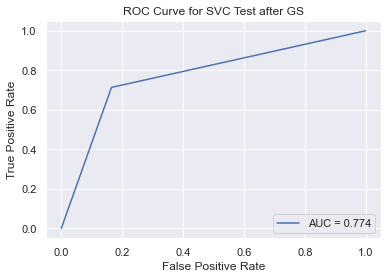

In [30]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, threshold = roc_curve(test_pred, y_test)
roc_auc = auc(fpr, tpr)
plt.title('ROC Curve for SVC Test after GS')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

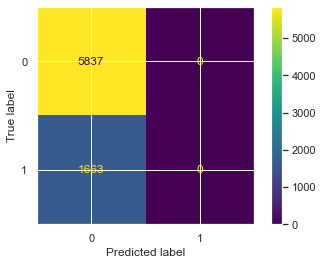

In [31]:
from sklearn.metrics import plot_confusion_matrix as cf
cf(svc, X_test, y_test)
plt.show()

Running the SVM again with these optimal parameters, we can see that the parameters for everything are actually more or less the same.

#### 4.1.2 Grid Search on GBC

In [32]:
np.random.seed(111)
param_grid2 = {'learning_rate' : [0.001, 0.01, 0.1, 0.25], "n_estimators" : [100, 250, 500, 1000], "max_depth":[3,5,8]}
gs2 = GridSearchCV(gbc, param_grid2, n_jobs = -1, cv=5, scoring="roc_auc",verbose=10)
gs2.fit(X, y)
print(gs.score(X,y))
print(gs.score(X_test,y_test))
print(gs2.best_params_)
print(gs2.best_estimator_)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    5.4s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   18.7s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   52.5s
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:  5.1min
[Parallel(n_jobs=-1)]: Done  69 tasks      | elapsed:  6.6min
[Parallel(n_jobs=-1)]: Done  82 tasks      | elapsed:  7.6min
[Parallel(n_jobs=-1)]: Done  97 tasks      | elapsed:  9.0min
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed: 39.4min
[Parallel(n_jobs=-1)]: Done 129 tasks      | elapsed: 40.5min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed: 41.4min
[Parallel(n_jobs=-1)]: Done 165 tasks      | elapsed: 42.9min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed: 45

0.50079482666776
0.5007742405915937
{'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 1000}
GradientBoostingClassifier(learning_rate=0.01, n_estimators=1000)


In [33]:
np.random.seed(111)
gbc = GradientBoostingClassifier(learning_rate=0.01, n_estimators=1000)
gbc.fit(X,y)
train_pred = gbc.predict(X)
test_pred = gbc.predict(X_test)

print('GradientBoostingClassifier (accuracy_score) on Train Set: ' + str(accuracy_score(train_pred, y)))
print('GradientBoostingClassifier (accuracy_score) on Test Set: ' + str(accuracy_score(test_pred, y_test)))
print('GradientBoostingClassifier (mean_absolute_error) on Train Set: ' + str(mean_absolute_error(train_pred, y)))
print('GradientBoostingClassifier (mean_absolute_error) on Test Set: ' + str(mean_absolute_error(test_pred, y_test)))
print('GradientBoostingClassifier (roc_auc_score) on Train Set: ' + str(roc_auc_score(train_pred, y)))
print('GradientBoostingClassifier (roc_auc_score) on Test Set: ' + str(roc_auc_score(test_pred, y_test)))
print('GradientBoostingClassifier (f1_score) on Train Set: ' + str(f1_score(train_pred, y)))
print('GradientBoostingClassifier (f1_score) on Test Set: ' + str(f1_score(test_pred, y_test)))

GradientBoostingClassifier (accuracy_score) on Train Set: 0.8217333333333333
GradientBoostingClassifier (accuracy_score) on Test Set: 0.8238666666666666
GradientBoostingClassifier (mean_absolute_error) on Train Set: 0.17826666666666666
GradientBoostingClassifier (mean_absolute_error) on Test Set: 0.17613333333333334
GradientBoostingClassifier (roc_auc_score) on Train Set: 0.7676570577195351
GradientBoostingClassifier (roc_auc_score) on Test Set: 0.7778531377229663
GradientBoostingClassifier (f1_score) on Train Set: 0.4574597592317056
GradientBoostingClassifier (f1_score) on Test Set: 0.45882834903727976


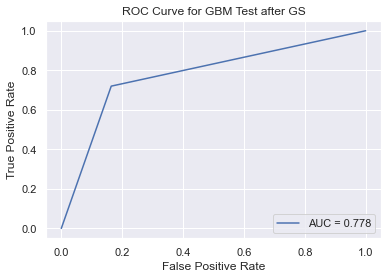

In [34]:
fpr, tpr, threshold = roc_curve(test_pred, y_test)
roc_auc = auc(fpr, tpr)
plt.title('ROC Curve for GBM Test after GS')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right') 
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

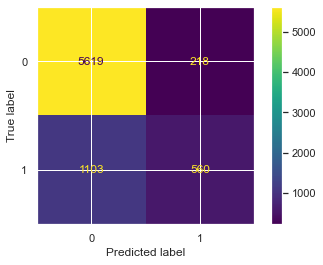

In [35]:
cf(gbc, X_test, y_test)
plt.show()

Likewise, running the GBM again with these optimal parameters, we can see that the parameters for everything are actually more or less the same.

### LightGBM (Not taught but for fun)

In [51]:
np.random.seed(111)
import lightgbm as lgb
lgbm = lgb.LGBMClassifier(num_leaves = 50,learning_rate = 0.001, num_iterations = 1000)
lgbm.fit(X, y)
train_pred = lgbm.predict(X)
test_pred = lgbm.predict(X_test)

print('LightGBM (accuracy_score) on Train Set: ' + str(accuracy_score(train_pred, y)))
print('LightGBM (accuracy_score) on Test Set: ' + str(accuracy_score(test_pred, y_test)))
print('LightGBM (mean_absolute_error) on Train Set: ' + str(mean_absolute_error(train_pred, y)))
print('LightGBM (mean_absolute_error) on Test Set: ' + str(mean_absolute_error(test_pred, y_test)))
print('LightGBM (roc_auc_score) on Train Set: ' + str(roc_auc_score(train_pred, y)))
print('LightGBM (roc_auc_score) on Test Set: ' + str(roc_auc_score(test_pred, y_test)))
print('LightGBM (f1_score) on Train Set: ' + str(f1_score(train_pred, y)))
print('LightGBM (f1_score) on Test Set: ' + str(f1_score(test_pred, y_test)))
#easily on par with our best model

C:\Users\alson\Anaconda3\lib\site-packages\lightgbm\engine.py:151: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


LightGBM (accuracy_score) on Train Set: 0.8220444444444445
LightGBM (accuracy_score) on Test Set: 0.8169333333333333
LightGBM (mean_absolute_error) on Train Set: 0.17795555555555556
LightGBM (mean_absolute_error) on Test Set: 0.18306666666666666
LightGBM (roc_auc_score) on Train Set: 0.7953587442370599
LightGBM (roc_auc_score) on Test Set: 0.7858887468221254
LightGBM (f1_score) on Train Set: 0.41221374045801523
LightGBM (f1_score) on Test Set: 0.38841870824053454
